# Predicting House Prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

<hr>

**[Problem 1] Feature selection for practice**

<hr>

In [2]:
data = pd.read_csv("train.csv")

df = pd.concat([data["GrLivArea"], data["YearBuilt"], data["SalePrice"]], axis=1)

df


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [4]:
df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

<hr>

**[Problem 2] Estimation and evaluation by linear regression**

<hr>

In [6]:
from sklearn.metrics import mean_squared_error
mSE_results_X0 = []
mSE_results_X1 = []
model_names = []

## X_train, X_test, y_train, y_test (StandardScaler)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

X0 = df.loc[:, ["GrLivArea"]]

y = df.loc[:, ["SalePrice"]]

X0_train, X0_test, y_train, y_test = train_test_split(X0, y, test_size=0.25, random_state=42)

X0_train_trans = StandardScaler().fit_transform(X0_train)

X0_test_trans = StandardScaler().fit_transform(X0_test)

X1 = df.loc[:, ["YearBuilt"]]

y = df.loc[:, ["SalePrice"]]

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42)

X1_train_trans = StandardScaler().fit_transform(X1_train)

X1_test_trans = StandardScaler().fit_transform(X1_test)



## Linear regression

In [8]:
reg = LinearRegression().fit(X0_train_trans, y_train)

reg_pred_x0 = reg.predict(X0_test_trans)

print("MSE GrLivArea:", mean_squared_error(y_true=y_test, y_pred=reg_pred_x0))

mSE_results_X0.append(mean_squared_error(y_true=y_test, y_pred=reg_pred_x0))
model_names.append("Linear regression")

MSE GrLivArea: 3098575951.3510942


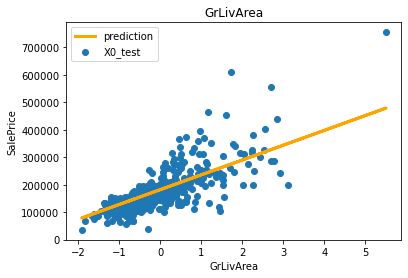

In [9]:
plt.scatter(X0_test_trans, y_test)
plt.plot(X0_test_trans, reg_pred_x0 , color='orange', linewidth=3)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["prediction","X0_test"])
plt.show()

In [10]:
reg = LinearRegression().fit(X1_train_trans, y_train)

reg_pred_x1 = reg.predict(X1_test_trans)

print("MSE YearBuilt:", mean_squared_error(y_true=y_test, y_pred=reg_pred_x1))

mSE_results_X1.append(mean_squared_error(y_true=y_test, y_pred=reg_pred_x1))

MSE YearBuilt: 5006973372.116411


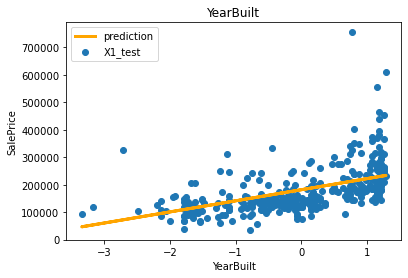

In [11]:
plt.scatter(X1_test_trans, y_test)
plt.plot(X1_test_trans, reg_pred_x1 , color='orange', linewidth=3)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["prediction","X1_test"])
plt.show()



<hr>

**[Problem 3] Comparison of methods**

<hr>

## SVC

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X0_train_trans, np.ravel(y_train))
clf_pred_X0 = clf.predict(X0_test_trans)

print("MSE GrLivArea:", mean_squared_error(y_true=y_test, y_pred=clf_pred_X0 ))

mSE_results_X0.append(mean_squared_error(y_true=y_test, y_pred=clf_pred_X0 ))
model_names.append("SVC")

MSE GrLivArea: 3698056236.652055


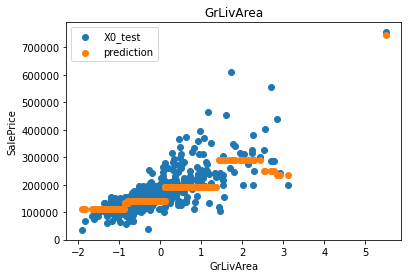

In [13]:
plt.scatter(X0_test_trans, y_test)
plt.scatter(X0_test_trans, clf_pred_X0)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X0_test","prediction"])
plt.show()


In [14]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X1_train_trans, np.ravel(y_train))
clf_pred_X1 = clf.predict(X1_test_trans)

print("MSE YearBuilt:", mean_squared_error(y_true=y_test, y_pred=clf_pred_X1 ))

mSE_results_X1.append(mean_squared_error(y_true=y_test, y_pred=clf_pred_X1 ))

MSE YearBuilt: 5379144154.460274


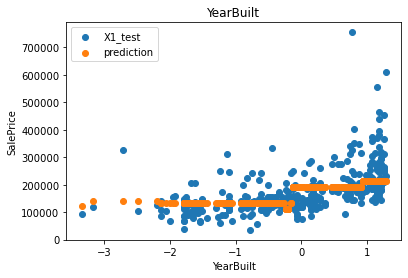

In [15]:
plt.scatter(X1_test_trans, y_test)
plt.scatter(X1_test_trans, clf_pred_X1)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X1_test","prediction"])
plt.show()

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X0_train_trans, y_train)
dtc_pred_X0 = dtc.predict(X0_test_trans)

print("MSE GrLivArea:", mean_squared_error(y_true=y_test, y_pred=dtc_pred_X0 ))

mSE_results_X0.append(mean_squared_error(y_true=y_test, y_pred=dtc_pred_X0 ))
model_names.append("Decision tree")

MSE GrLivArea: 5616133539.4


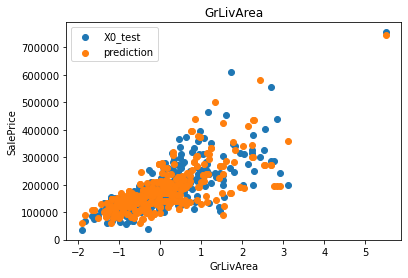

In [17]:
plt.scatter(X0_test_trans, y_test)
plt.scatter(X0_test_trans, dtc_pred_X0)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X0_test","prediction"])
plt.show()

In [18]:
dtc = DecisionTreeClassifier().fit(X1_train_trans, y_train)
dtc_pred_X1 = dtc.predict(X1_test_trans)

print("MSE YearBuilt:", mean_squared_error(y_true=y_test, y_pred=dtc_pred_X1 ))

mSE_results_X1.append(mean_squared_error(y_true=y_test, y_pred=dtc_pred_X1 ))

MSE YearBuilt: 6886803782.008219


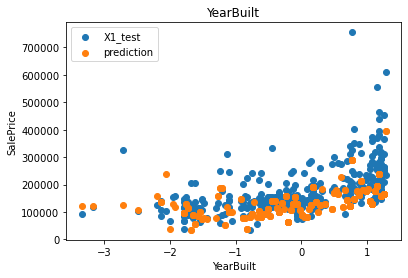

In [19]:
plt.scatter(X1_test_trans, y_test)
plt.scatter(X1_test_trans, dtc_pred_X1)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X1_test","prediction"])
plt.show()

## Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X0_train_trans, np.ravel(y_train))
rfc_pred_X0 = rfc.predict(X0_test_trans)

print("MSE GrLivArea:", mean_squared_error(y_true=y_test, y_pred=rfc_pred_X0))

mSE_results_X0.append(mean_squared_error(y_true=y_test, y_pred=rfc_pred_X0))
model_names.append("Random forest")

MSE GrLivArea: 5733593540.572602


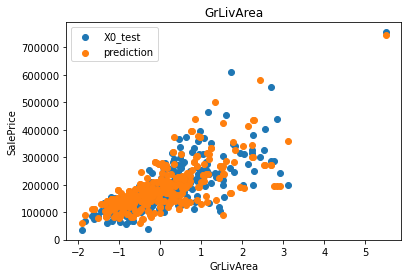

In [21]:
plt.scatter(X0_test_trans, y_test)
plt.scatter(X0_test_trans, rfc_pred_X0)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(["X0_test","prediction"])
plt.show()

In [22]:
rfc = RandomForestClassifier().fit(X1_train_trans, np.ravel(y_train))
rfc_pred_X1 = rfc.predict(X1_test_trans)

print("MSE YearBuilt:", mean_squared_error(y_true=y_test, y_pred=rfc_pred_X1))

mSE_results_X1.append(mean_squared_error(y_true=y_test, y_pred=rfc_pred_X1))

MSE YearBuilt: 9120592616.186302


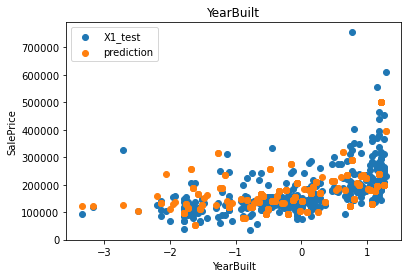

In [23]:
plt.scatter(X1_test_trans, y_test)
plt.scatter(X1_test_trans, rfc_pred_X1)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(["X1_test","prediction"])
plt.show()

In [24]:
pd.DataFrame(mSE_results_X0, index=model_names, columns=['MSE GrLivArea'])

,MSE GrLivArea
Linear regression,3.098576e+09
SVC,3.698056e+09
Decision tree,5.616134e+09
Random forest,5.733594e+09


From the table above, linear regression has the best measurement accuracy, followed by SVC, which has the best measurement accuracy, and Random forest, which has the worst measurement accuracy.

In [25]:
pd.DataFrame(mSE_results_X1, index=model_names, columns=['MSE YearBuilt'])

,MSE YearBuilt
Linear regression,5.006973e+09
SVC,5.379144e+09
Decision tree,6.886804e+09
Random forest,9.120593e+09


From the table above, linear regression has the best measurement accuracy, followed by SVC and Decision tree, which has the best measurement accuracy, and Random forest, which has the worst measurement accuracy.